# **UTS PENCARIAN DAN PENAMBANGAN DATA**
Nama : Muhamad Nizamudin

NIM : 200411100193

Kelas : Pencarian dan Penambangan Web A

Pada project UTS ini saya akan membahas tentang proses crawling web pta, melakukan normalisasi data abstrak, pemrposesan LDA untuk reduksi dimensi dan membuat model klasifikasi dan clustering

## **Crawling Web PTA Trunojoyo**

Lakukan crawling data pada data pta.trunojoyo.ac.id dan data dimpan dalam  .csv
ambil data

*   Judul
*   Nama penulis
*   Nama pembimbing 1
*   Nama pembimbing 2
*   Abstrak

### **Import Library**
import library yang dibutuhkan

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

### **Memasukkan link pta.trunojoyo.ac.id**
saya akan mendeklarasikan variable search by dan index search untuk menentukan link pada pencarian

In [ ]:
search_by = 'byprod'
index_search= 10

In [ ]:
url = 'https://pta.trunojoyo.ac.id/c_search/{}/{}/'.format(search_by, index_search)

### **Mengambil data dari Web pta.trunojoyo.ac.id**

In [ ]:
datas = []
for ipages in range(1,50):
  response = requests.get(url+str(ipages)) # variabel response melakukan permintaan HTTP get ke url yang disimpan dan mendapatkan data dari halaman web
  soup = BeautifulSoup(response.text, 'html.parser') #Isi teks dari respons HTTP yang diterima dari server web setelah melakukan permintaan GET.
  items = soup.findAll('li', {'data-id' :'id-1'}) #menemukan semua <li> yang memuat data-id : id-1
  for it in items:
    # mengambil data judul skripsi
    title = it.find('a', 'title').text

    # mengambil data penulis
    spans = it.find_all('span')
    penulis = spans[0].text.replace('Penulis :', '')

    # mengambil data pembimbing 1 dan 2
    pembimbing_1 = spans[1].text.replace('Dosen Pembimbing I :', '')
    pembimbing_2 = spans[2].text.replace('Dosen Pembimbing II :', '')

    # pindah ke halaman selengkapnya untuk mengambil data abstrak
    button_next_pages   = it.find('a','gray button').get('href')
    response_next_pages = requests.get(button_next_pages)
    # print(response)

    # mengambil data abstrak
    soup = BeautifulSoup(response_next_pages.text, 'html.parser')
    abstrak =  soup.find('p', {'align' :'justify'}).text.replace('ABSTRAK', '')
    # print(abstrak,'\n')

    # memasukkan data ke dalam list datas
    datas.append({
            'Judul': title,
            'Nama Penulis': penulis,
            'Pembimbing I': pembimbing_1,
            'Pembimbing II': pembimbing_2,
            'Abstrak' : abstrak
            })

### **Eksport ke CSV**

In [ ]:
# # Menyimpan data dalam bentuk CSV
# csv_filename = 'pta_data.csv'
# with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
#     fieldnames = ['Judul', 'Nama Penulis', 'Pembimbing I', 'Pembimbing II', 'Abstrak']
#     csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     csv_writer.writeheader()

#     for entry in datas:
#         csv_writer.writerow(entry)

# print(f"Data telah disimpan dalam file {csv_filename}")

## **Normalisasi Data Text**
1. Punctuation process menghilangkan tanda baca dan simbol

2. stopword

3. Tokenisasi

4. Steeming

5. Feature extraction dan membentuk VSM dalam term frequency, logarithm freqency, one-hot encoding,  TF-IDF

### **Import Library**

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
import re
import warnings
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Mengambil Data Skripsi**

In [2]:
import os

%cd /content/
os.mkdir('data_skripsi')

import gdown
# download data

nama_data = '/content/data_skripsi/data_skripsi.csv'
gdown.download(f'https://drive.google.com/uc?id=1iJWlWqGNROHiBf2qv329gGSkwhYJfVMT', nama_data, quiet=False)

/content


Downloading...
From: https://drive.google.com/uc?id=1iJWlWqGNROHiBf2qv329gGSkwhYJfVMT
To: /content/data_skripsi/data_skripsi.csv
100%|██████████| 1.25M/1.25M [00:00<00:00, 71.8MB/s]


'/content/data_skripsi/data_skripsi.csv'

In [3]:
data_skripsi = pd.read_csv('/content/data_skripsi/data_skripsi.csv')
data_skripsi

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK
...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK


### **Mengambil data abstrak**

In [4]:
data_abstrak = data_skripsi['Abstrak']
data_abstrak

0      Sistem  informasi  akademik  (SIAKAD) merupaka...
1      Berjalannya koneksi jaringan komputer dengan l...
2      Web server adalah sebuah perangkat lunak serve...
3      Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4      Seiring perkembangan teknologi yang ada diduni...
                             ...                        
853    Investasi saham selama ini memiliki resiko ker...
854    Information Retrieval (IR) merupakan pengambil...
855    Klasifikasi citra merupakan proses pengelompok...
856    Identifikasi atribut pejalan kaki merupakan sa...
857    Topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 858, dtype: object

### **Cleaning Data**

In [5]:
# cek apakah ada data yang kosong
data_abstrak.isnull().sum()

29

In [6]:
# membersihkan data yang kosong
data_abstrak = data_abstrak.dropna()
data_abstrak.isnull().sum()

0

### **Punctuation : Menghapus Data Tidak Perlu**

In [7]:
import string

data_skripsi['Abstrak_punctuation'] = data_skripsi['Abstrak'].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Menghilangkan angka dari kolom 'new_abstrak'
data_skripsi['Abstrak_punctuation'] = data_skripsi['Abstrak_punctuation'].str.replace('\d+', '', regex=True)

data_skripsi

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label,Abstrak_punctuation
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL,sistem informasi akademik siakad merupakan ...
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL,berjalannya koneksi jaringan komputer dengan l...
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL,web server adalah sebuah perangkat lunak serve...
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK,penjadwalan kuliah di perguruan tinggi me...
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK,seiring perkembangan teknologi yang ada diduni...
...,...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK,investasi saham selama ini memiliki resiko ker...
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK,information retrieval ir merupakan pengambilan...
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK,klasifikasi citra merupakan proses pengelompok...
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK,identifikasi atribut pejalan kaki merupakan sa...


In [8]:
# Menyimpan kolom abstrak_punctuation kedalam variable data_abstrak_new
data_abstrak_new = data_skripsi['Abstrak_punctuation']
data_abstrak_new

0      sistem  informasi  akademik  siakad merupakan ...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan  kuliah  di  perguruan  tinggi  me...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
853    investasi saham selama ini memiliki resiko ker...
854    information retrieval ir merupakan pengambilan...
855    klasifikasi citra merupakan proses pengelompok...
856    identifikasi atribut pejalan kaki merupakan sa...
857    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak_punctuation, Length: 858, dtype: object

### **Stopword**
kata-kata umum yang sering muncul dalam teks namun memiliki sedikit nilai informatif dalam analisis teks atau pemrosesan bahasa alami

In [9]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words di luar loop
# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    if isinstance(text, str):  # Periksa apakah teks adalah string
        return ' '.join(word for word in text.split() if word not in stop_words)
    else:
        return ''  # Mengembalikan string kosong untuk nilai non-string

data_skripsi['Abstrak_Stopword'] = data_abstrak_new.apply(remove_stopwords)
data_skripsi

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label,Abstrak_punctuation,Abstrak_Stopword
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL,sistem informasi akademik siakad merupakan ...,sistem informasi akademik siakad sistem inform...
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer lancar g...
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL,web server adalah sebuah perangkat lunak serve...,web server perangkat lunak server berfungsi me...
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah perguruan kompleks permasal...
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi didunia muncul ...
...,...,...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK,investasi saham selama ini memiliki resiko ker...,investasi saham memiliki resiko kerugian dikar...
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK,information retrieval ir merupakan pengambilan...,information retrieval ir pengambilan informasi...
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK,klasifikasi citra merupakan proses pengelompok...,klasifikasi citra proses pengelompokan piksel ...
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK,identifikasi atribut pejalan kaki merupakan sa...,identifikasi atribut pejalan kaki salah peneli...


In [10]:
# menyimpan kolom abstrak_stopword kedalam variable data_abstrak_stopword
data_abstrak_stopword = data_skripsi['Abstrak_Stopword']
data_abstrak_stopword

0      sistem informasi akademik siakad sistem inform...
1      berjalannya koneksi jaringan komputer lancar g...
2      web server perangkat lunak server berfungsi me...
3      penjadwalan kuliah perguruan kompleks permasal...
4      seiring perkembangan teknologi didunia muncul ...
                             ...                        
853    investasi saham memiliki resiko kerugian dikar...
854    information retrieval ir pengambilan informasi...
855    klasifikasi citra proses pengelompokan piksel ...
856    identifikasi atribut pejalan kaki salah peneli...
857    topik deteksi objek menarik perhatian perkemba...
Name: Abstrak_Stopword, Length: 858, dtype: object

### **Tokenisasi**

In [11]:
data_skripsi['Abstrak_Tokens'] = data_abstrak_stopword.apply(word_tokenize)
data_skripsi

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label,Abstrak_punctuation,Abstrak_Stopword,Abstrak_Tokens
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL,sistem informasi akademik siakad merupakan ...,sistem informasi akademik siakad sistem inform...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer lancar g...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL,web server adalah sebuah perangkat lunak serve...,web server perangkat lunak server berfungsi me...,"[web, server, perangkat, lunak, server, berfun..."
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah perguruan kompleks permasal...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi didunia muncul ...,"[seiring, perkembangan, teknologi, didunia, mu..."
...,...,...,...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK,investasi saham selama ini memiliki resiko ker...,investasi saham memiliki resiko kerugian dikar...,"[investasi, saham, memiliki, resiko, kerugian,..."
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK,information retrieval ir merupakan pengambilan...,information retrieval ir pengambilan informasi...,"[information, retrieval, ir, pengambilan, info..."
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK,klasifikasi citra merupakan proses pengelompok...,klasifikasi citra proses pengelompokan piksel ...,"[klasifikasi, citra, proses, pengelompokan, pi..."
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK,identifikasi atribut pejalan kaki merupakan sa...,identifikasi atribut pejalan kaki salah peneli...,"[identifikasi, atribut, pejalan, kaki, salah, ..."


In [12]:
# menyimpan kolom Abstrak_tokens kedalam variable abstrak_tokens
abstrak_tokens = data_skripsi['Abstrak_Tokens']
abstrak_tokens

0      [sistem, informasi, akademik, siakad, sistem, ...
1      [berjalannya, koneksi, jaringan, komputer, lan...
2      [web, server, perangkat, lunak, server, berfun...
3      [penjadwalan, kuliah, perguruan, kompleks, per...
4      [seiring, perkembangan, teknologi, didunia, mu...
                             ...                        
853    [investasi, saham, memiliki, resiko, kerugian,...
854    [information, retrieval, ir, pengambilan, info...
855    [klasifikasi, citra, proses, pengelompokan, pi...
856    [identifikasi, atribut, pejalan, kaki, salah, ...
857    [topik, deteksi, objek, menarik, perhatian, pe...
Name: Abstrak_Tokens, Length: 858, dtype: object

### **Vector Space Model (VSM)**

#### **One Hot Encoder**
Pada one-hot encoding, setiap kategori dalam variabel dikonversi menjadi vektor biner (seringkali 0 dan 1), di mana setiap kategori diwakili oleh satu elemen yang bernilai 1 dan elemen lainnya bernilai 0. Ini memungkinkan model machine learning untuk memproses dan memahami variabel kategori sebagai fitur numerik.

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
data_abstrak_text = abstrak_tokens.apply(lambda tokens: ' '.join(tokens))

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder()

# Inisialisasi CountVectorizer
count_vectorizer = CountVectorizer()  # mengubah setiap dokumen teks menjadi vektor

# Melakukan one-hot encoding pada kolom 'final_abstrak'
one_hot_encoded = count_vectorizer.fit_transform(data_abstrak_text)

# Membuat DataFrame dari hasil perhitungan onehot
data_abstrak_one_hot = pd.DataFrame(one_hot_encoded.toarray(), columns=count_vectorizer.get_feature_names_out())

# Menambahkan kolom 'Abstrak' ke dalam DataFrame hasil onehot
data_abstrak_one_hot.insert(0, 'Abstrak',data_abstrak)

In [15]:
# df_baru
data_abstrak_one_hot

,Abstrak,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âaplikasi,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼
0,Sistem informasi akademik (SIAKAD) merupaka...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berjalannya koneksi jaringan komputer dengan l...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Web server adalah sebuah perangkat lunak serve...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Penjadwalan kuliah di Perguruan Tinggi me...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Seiring perkembangan teknologi yang ada diduni...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,Investasi saham selama ini memiliki resiko ker...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,Information Retrieval (IR) merupakan pengambil...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,Klasifikasi citra merupakan proses pengelompok...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,Identifikasi atribut pejalan kaki merupakan sa...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_abstrak_one_hot.to_csv('OneHotEncoder_data_X_tfidf_train.csv', index=False)

#### **Term Frequency**
Term Frequency (TF), dalam konteks pemrosesan bahasa alami (Natural Language Processing - NLP) atau informasi teks, adalah metrik yang mengukur seberapa sering suatu kata atau term muncul dalam dokumen atau teks tertentu. Hasil dari perhitungan TF adalah skor yang menggambarkan seberapa sering suatu kata atau term muncul dalam dokumen tertentu.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
count_vectorizer = CountVectorizer()

# Menghitung Term Frequency (TF) dari kolom 'data_abstrak_text'
tf_matrix = count_vectorizer.fit_transform(data_abstrak_text)

# Membuat DataFrame dari hasil perhitungan TF
data_abstrak_tf = pd.DataFrame(tf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Menambahkan kolom 'stemmed_tokens' ke dalam DataFrame hasil TF
data_abstrak_tf.insert(0, 'Abstrak',data_abstrak)

# Tampilkan hasil Term Frequency (TF)
data_abstrak_tf

,Abstrak,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âaplikasi,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼
0,Sistem informasi akademik (SIAKAD) merupaka...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berjalannya koneksi jaringan komputer dengan l...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Web server adalah sebuah perangkat lunak serve...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Penjadwalan kuliah di Perguruan Tinggi me...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Seiring perkembangan teknologi yang ada diduni...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,Investasi saham selama ini memiliki resiko ker...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,Information Retrieval (IR) merupakan pengambil...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,Klasifikasi citra merupakan proses pengelompok...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,Identifikasi atribut pejalan kaki merupakan sa...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_abstrak_tf.to_csv('Term Frequensi_data_X_tfidf_train.csv', index=False)

#### **Log Frequency**
Logarithmic Frequency (Log Freq) adalah metode yang digunakan dalam analisis teks dan pemrosesan bahasa alami (Natural Language Processing - NLP) untuk mengukur frekuensi kata atau term dalam dokumen atau teks dengan skala logaritmik.

In [19]:
# Menggunakan CountVectorizer untuk menghitung Term Frequency (TF) dari setiap kata dalam abstrak.
count_vectorizer = CountVectorizer()
tf_matrix = count_vectorizer.fit_transform(data_abstrak_text)

# Mengambil daftar kata-kata (tokens) yang digunakan sebagai fitur dalam TF.
tokens = count_vectorizer.get_feature_names_out()

# Mengambil nilai-nilai TF dalam bentuk matriks array.
tf_values = tf_matrix.toarray()

# Menggunakan logaritma natural (logaritma alami) untuk menghitung Log Frequency (Log Freq) dari nilai TF.
log_tf_values = np.log(tf_values + 1)

# Membuat DataFrame yang berisi nilai Log Freq, dengan kolom-kolom yang sesuai dengan kata-kata.
log_tf_df = pd.DataFrame(log_tf_values, columns=tokens)

# Menggabungkan DataFrame data_abstrak (abstrak asli) dengan DataFrame log_tf_df (Log Freq).
data_abstrak_log_freq = pd.concat([data_abstrak, log_tf_df], axis=1)

data_abstrak_log_freq

,Abstrak,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âaplikasi,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼
0,Sistem informasi akademik (SIAKAD) merupaka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Berjalannya koneksi jaringan komputer dengan l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Web server adalah sebuah perangkat lunak serve...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Seiring perkembangan teknologi yang ada diduni...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
680,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_abstrak_log_freq.to_csv('LogFreq_data_abstrak_X_tfidf_train.csv', index=False)

#### **TF IDF**
Pentingnya Kata di Seluruh Koleksi Dokumen (IDF - Inverse Document Frequency): Ini berarti seberapa unik atau langka kata itu dalam semua dokumen yang ada. Kata-kata umum seperti "dan" atau "atau" memiliki skor IDF yang rendah karena muncul di hampir semua dokumen. Kata-kata yang langka atau spesifik dalam beberapa dokumen akan memiliki skor IDF yang tinggi.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data_abstrak_text).toarray()
terms = vectorizer.get_feature_names_out()

data_abstrak_tfidf = pd.DataFrame(x, columns=terms)
data_abstrak_tfidf.insert(0, 'Abstrak', data_abstrak_text)

data_abstrak_tfidf

,Abstrak,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âaplikasi,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼
0,sistem informasi akademik siakad sistem inform...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,berjalannya koneksi jaringan komputer lancar g...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,web server perangkat lunak server berfungsi me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,penjadwalan kuliah perguruan kompleks permasal...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,seiring perkembangan teknologi didunia muncul ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,investasi saham memiliki resiko kerugian dikar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,information retrieval ir pengambilan informasi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,klasifikasi citra proses pengelompokan piksel ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,identifikasi atribut pejalan kaki salah peneli...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data_abstrak_tfidf.to_csv('TFIDF_data_X_tfidf_train.csv', index=False)

#### **Menggabung TF-IDF dengan Label**

In [23]:
tfidf_label = pd.concat([data_abstrak_tfidf,data_skripsi['Label']],axis=1)
tfidf_label

,Abstrak,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼,Label
0,sistem informasi akademik siakad sistem inform...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
1,berjalannya koneksi jaringan komputer lancar g...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
2,web server perangkat lunak server berfungsi me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
3,penjadwalan kuliah perguruan kompleks permasal...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
4,seiring perkembangan teknologi didunia muncul ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,investasi saham memiliki resiko kerugian dikar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
854,information retrieval ir pengambilan informasi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
855,klasifikasi citra proses pengelompokan piksel ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
856,identifikasi atribut pejalan kaki salah peneli...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK


In [24]:
# cek data nan/kosong
tfidf_label.isna().sum()

Abstrak     0
aalysis     0
aam         0
ab          0
abad        0
           ..
ârancang    0
âwisata     0
âµ          0
â¼          0
Label       0
Length: 9089, dtype: int64

In [25]:
# Menyimpan DataFrame ke dalam berkas CSV
tfidf_label.to_csv('tfidf_label.csv', index=False)

### **Memecah Data**

In [26]:
# import library
from sklearn.model_selection import train_test_split

In [27]:
# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = tfidf_label.iloc[:,1:-1]
# X_tfidf
y_tfidf = tfidf_label["Label"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

In [28]:
print("panjang data",len(tfidf_label))
print("panjang x_tfidf_train",len(X_tfidf_train))
print("panjang x_tfidf_test",len(X_tfidf_test))

panjang data 858
panjang x_tfidf_train 686
panjang x_tfidf_test 172


In [29]:
X_tfidf_train.to_csv("X_tfidf_train.csv",index=False)
X_tfidf_test.to_csv("X_tfidf_test.csv",index=False)

## **Reduksi Dimensi dengan Menggunakan Latent Dirichlet Allocation (LDA)**

### **Import Library**

In [30]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

In [31]:
# tfidf
data_tfidf_train  = X_tfidf_train
data_tfidf_test = X_tfidf_test

In [32]:
print(len(data_tfidf_train))
print(len(data_tfidf_test))

686
172


### **Proses Latent Dirichlet Allocation (LDA)**

In [33]:
# import
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 10
alpha = 0.1
beta = 0.2

#### **LDA data Train**

In [35]:
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(data_tfidf_train)

# simpan kolom
topik_kolom = []

for i in range(1,k+1):
  topik_kolom.append(f'Topik {i}')
  print (f". . . . topik {i} telah dibuat")

. . . . topik 1 telah dibuat
. . . . topik 2 telah dibuat
. . . . topik 3 telah dibuat
. . . . topik 4 telah dibuat
. . . . topik 5 telah dibuat
. . . . topik 6 telah dibuat
. . . . topik 7 telah dibuat
. . . . topik 8 telah dibuat
. . . . topik 9 telah dibuat
. . . . topik 10 telah dibuat


In [36]:
proporsi_topik_dokumen_train_df = pd.DataFrame(proporsi_topik_dokumen, columns=topik_kolom)
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_train_df

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10
0,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.857917,0.015787,0.015787
1,0.013721,0.013721,0.013721,0.013721,0.013721,0.013722,0.013721,0.876510,0.013721,0.013721
2,0.014465,0.014465,0.014468,0.869787,0.014465,0.014469,0.014469,0.014480,0.014465,0.014465
3,0.015433,0.015435,0.015438,0.015434,0.015436,0.861086,0.015435,0.015437,0.015434,0.015432
4,0.550335,0.013758,0.013758,0.013754,0.013754,0.013757,0.013757,0.339618,0.013755,0.013754
...,...,...,...,...,...,...,...,...,...,...
681,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
682,0.012466,0.012467,0.012467,0.012467,0.012467,0.012467,0.012467,0.012468,0.887797,0.012466
683,0.013397,0.686421,0.013397,0.013397,0.013396,0.013398,0.013397,0.206404,0.013396,0.013398
684,0.861985,0.015333,0.015333,0.015337,0.015333,0.015338,0.015333,0.015341,0.015334,0.015333


In [37]:
proporsi_topik_dokumen_train_df = pd.concat([proporsi_topik_dokumen_train_df,y_tfidf_train],axis = 1)

In [38]:
proporsi_topik_dokumen_train_df = proporsi_topik_dokumen_train_df.dropna()

In [39]:
proporsi_topik_dokumen_train_df

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,Label
0,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.857917,0.015787,0.015787,RPL
1,0.013721,0.013721,0.013721,0.013721,0.013721,0.013722,0.013721,0.876510,0.013721,0.013721,RPL
2,0.014465,0.014465,0.014468,0.869787,0.014465,0.014469,0.014469,0.014480,0.014465,0.014465,RPL
3,0.015433,0.015435,0.015438,0.015434,0.015436,0.861086,0.015435,0.015437,0.015434,0.015432,KK
4,0.550335,0.013758,0.013758,0.013754,0.013754,0.013757,0.013757,0.339618,0.013755,0.013754,KK
...,...,...,...,...,...,...,...,...,...,...,...
680,0.015426,0.015426,0.015427,0.015427,0.015426,0.015431,0.015426,0.015430,0.861153,0.015427,KK
681,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,KK
682,0.012466,0.012467,0.012467,0.012467,0.012467,0.012467,0.012467,0.012468,0.887797,0.012466,RPL
683,0.013397,0.686421,0.013397,0.013397,0.013396,0.013398,0.013397,0.206404,0.013396,0.013398,KK


In [40]:
proporsi_topik_dokumen_train_df_final = pd.concat([data_skripsi['Abstrak'],proporsi_topik_dokumen_train_df],axis=1)
proporsi_topik_dokumen_train_df_final = proporsi_topik_dokumen_train_df_final.dropna()
proporsi_topik_dokumen_train_df_final

,Abstrak,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.857917,0.015787,0.015787,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.013721,0.013721,0.013721,0.013721,0.013721,0.013722,0.013721,0.876510,0.013721,0.013721,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.014465,0.014465,0.014468,0.869787,0.014465,0.014469,0.014469,0.014480,0.014465,0.014465,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.015433,0.015435,0.015438,0.015434,0.015436,0.861086,0.015435,0.015437,0.015434,0.015432,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.550335,0.013758,0.013758,0.013754,0.013754,0.013757,0.013757,0.339618,0.013755,0.013754,KK
...,...,...,...,...,...,...,...,...,...,...,...,...
677,Kambing adalah salah satu hewan ternak yang di...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,KK
678,Content Based Image Retrieval (CBIR) ialah sal...,0.010693,0.010695,0.010698,0.903743,0.010694,0.010695,0.010695,0.010698,0.010696,0.010694,KK
682,Sistem pengendalian persediaan barang (...,0.012466,0.012467,0.012467,0.012467,0.012467,0.012467,0.012467,0.012468,0.887797,0.012466,RPL
683,Segmentasi citra merupakan tahapan terpenting ...,0.013397,0.686421,0.013397,0.013397,0.013396,0.013398,0.013397,0.206404,0.013396,0.013398,KK


In [41]:
proporsi_topik_dokumen_train_df_final.to_csv("proporsi_topik_dokumen_train_df_final.csv",index = False)

In [42]:
# Proporsi kata pada topik
fitur = X_tfidf_train.columns.tolist()
ProporsiKataTopik_train = lda_model.components_
ProporsiKataTopik_train_df = pd.DataFrame(ProporsiKataTopik_train, columns = fitur)
ProporsiKataTopik_train_df.insert(0,'Topik',topik_kolom)
ProporsiKataTopik_train_df

,Topik,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âaplikasi,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼
0,Topik 1,0.200000,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.310329,0.200000,0.20000,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000
1,Topik 2,0.200000,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.20000,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000
2,Topik 3,0.200000,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.275873,0.200000,...,0.200000,0.313932,0.20000,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000
3,Topik 4,0.200000,0.2,0.315363,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.20000,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.300902
4,Topik 5,0.200000,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.31009,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000
5,Topik 6,0.200000,0.2,0.200000,0.200000,0.357724,0.200000,0.260077,0.452769,0.200000,...,0.200000,0.200000,0.20000,0.275017,0.200000,0.2,0.200000,0.200001,0.2,0.200000
6,Topik 7,0.200000,0.2,0.200000,0.200000,0.200000,0.200000,0.416595,0.200000,0.200000,...,0.200000,0.313327,0.20000,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000
7,Topik 8,0.204127,0.2,0.200000,0.271996,0.200000,0.200000,0.270285,0.393802,0.319521,...,0.200000,0.239483,0.20000,0.200000,0.204127,0.2,0.280188,0.278521,0.2,0.200000
8,Topik 9,0.328193,0.2,0.200000,0.200000,0.200000,0.310158,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.20000,0.200000,0.328193,0.2,0.200000,0.200000,0.2,0.200000
9,Topik 10,0.200000,0.2,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.20000,0.200000,0.200000,0.2,0.200000,0.200000,0.2,0.200000


In [43]:
ProporsiKataTopik_train_df.to_csv("ProporsiKataTopik_train_df.csv",index=False)

#### **LDA data Test**

In [44]:
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_test = lda_model.fit_transform(data_tfidf_test)

# simpan kolom
topik_kolom = []

for i in range(1,k+1):
  topik_kolom.append(f'Topik {i}')
  print (f". . . . topik {i} telah dibuat")

. . . . topik 1 telah dibuat
. . . . topik 2 telah dibuat
. . . . topik 3 telah dibuat
. . . . topik 4 telah dibuat
. . . . topik 5 telah dibuat
. . . . topik 6 telah dibuat
. . . . topik 7 telah dibuat
. . . . topik 8 telah dibuat
. . . . topik 9 telah dibuat
. . . . topik 10 telah dibuat


In [45]:
proporsi_topik_dokumen_test_df = pd.DataFrame(proporsi_topik_dokumen_test, columns=topik_kolom)
# proporsi_topik_dokumen_df_test.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_test_df

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10
0,0.016155,0.016153,0.016156,0.016154,0.016154,0.854608,0.016155,0.016155,0.016155,0.016156
1,0.867800,0.014688,0.014690,0.014688,0.014689,0.014689,0.014689,0.014689,0.014689,0.014689
2,0.013502,0.013501,0.013503,0.013502,0.013502,0.013501,0.878482,0.013502,0.013502,0.013503
3,0.022390,0.022390,0.022393,0.022390,0.022390,0.022394,0.798480,0.022391,0.022391,0.022392
4,0.011931,0.011930,0.011932,0.011930,0.011930,0.011932,0.011931,0.892623,0.011931,0.011931
...,...,...,...,...,...,...,...,...,...,...
167,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
168,0.012054,0.012053,0.891515,0.012053,0.012053,0.012056,0.012054,0.012054,0.012054,0.012054
169,0.015053,0.015051,0.015053,0.015051,0.015052,0.015053,0.864528,0.015052,0.015052,0.015055
170,0.014917,0.014916,0.865744,0.014917,0.014918,0.014918,0.014917,0.014917,0.014917,0.014919


In [46]:
proporsi_topik_dokumen_test_df = pd.concat([proporsi_topik_dokumen_test_df,y_tfidf_test],axis = 1)

In [47]:
proporsi_topik_dokumen_test_df = proporsi_topik_dokumen_train_df.dropna()

In [48]:
proporsi_topik_dokumen_test_df

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,Label
0,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.015787,0.857917,0.015787,0.015787,RPL
1,0.013721,0.013721,0.013721,0.013721,0.013721,0.013722,0.013721,0.876510,0.013721,0.013721,RPL
2,0.014465,0.014465,0.014468,0.869787,0.014465,0.014469,0.014469,0.014480,0.014465,0.014465,RPL
3,0.015433,0.015435,0.015438,0.015434,0.015436,0.861086,0.015435,0.015437,0.015434,0.015432,KK
4,0.550335,0.013758,0.013758,0.013754,0.013754,0.013757,0.013757,0.339618,0.013755,0.013754,KK
...,...,...,...,...,...,...,...,...,...,...,...
680,0.015426,0.015426,0.015427,0.015427,0.015426,0.015431,0.015426,0.015430,0.861153,0.015427,KK
681,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,KK
682,0.012466,0.012467,0.012467,0.012467,0.012467,0.012467,0.012467,0.012468,0.887797,0.012466,RPL
683,0.013397,0.686421,0.013397,0.013397,0.013396,0.013398,0.013397,0.206404,0.013396,0.013398,KK


In [49]:
proporsi_topik_dokumen_test_df_final = pd.concat([data_skripsi['Abstrak'],proporsi_topik_dokumen_test_df],axis=1)
proporsi_topik_dokumen_test_df_final = proporsi_topik_dokumen_test_df_final.dropna()
proporsi_topik_dokumen_test_df_final.to_csv("proporsi_topik_dokumen_test_df_final.csv",index=False)

In [50]:
# Proporsi kata pada topik
fitur = X_tfidf_test.columns.tolist()
ProporsiKataTopik = lda_model.components_
ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
ProporsiKataTopik_df.insert(0,'Topik',topik_kolom)
ProporsiKataTopik_df

,Topik,aalysis,aam,ab,abad,abadi,ability,abjad,absensi,absolut,...,âaplikasi,âbaikâ,âbaikâkata,âc,âhal,âperancangan,ârancang,âwisata,âµ,â¼
0,Topik 1,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
1,Topik 2,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
2,Topik 3,0.2,0.200000,0.2,0.269794,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.296425,0.2,0.2,0.200000,0.2
3,Topik 4,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
4,Topik 5,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
5,Topik 6,0.2,0.365184,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
6,Topik 7,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
7,Topik 8,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.365374,0.2
8,Topik 9,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2
9,Topik 10,0.2,0.200000,0.2,0.200000,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.200000,0.2,0.2,0.200000,0.2


In [51]:
ProporsiKataTopik_df.to_csv("ProporsiKataTopik_df_test.csv",index=False)

## **Modeling**

#### K-Means Clustering

In [74]:
from sklearn.cluster import KMeans

x = proporsi_topik_dokumen_train_df.iloc[:, :-1]

y = proporsi_topik_dokumen_train_df['Label']

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

proporsi_topik_dokumen_train_df['Label'] = le.fit_transform(proporsi_topik_dokumen_train_df['Label'])

y = le.transform(y)

In [77]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

In [84]:
accuracies_kmeans = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)
    labels = kmeans.labels_

    # check how many of the samples were correctly labeled
    correct_labels = sum(y == labels)
    akurasi_kmeans = correct_labels/float(y.size)
    akurasi_kmeans = round(akurasi_kmeans * 100)
    accuracies_kmeans.append(akurasi_kmeans)

accuracies_kmeans

[55, 55, 55, 55, 55, 55, 55, 55, 55, 55]

In [86]:
accuracy_kmeans_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_kmeans})
accuracy_kmeans_df.to_csv("accuracy_kmeans_df.csv",index=False)

#### Naive Bayes

In [52]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

In [53]:
x_train_model = proporsi_topik_dokumen_train_df.iloc[:,:-1]
x_test_model = proporsi_topik_dokumen_test_df.iloc[:,:-1]
# x_test_model
y_train_model = proporsi_topik_dokumen_train_df.iloc[:,-1]
y_test_model = proporsi_topik_dokumen_test_df.iloc[:,-1]

In [54]:
# Inisialisasi array untuk menyimpan akurasi
accuracies_nb = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    nb = GaussianNB()

    # Latih model pada kolom topik tertentu
    nb.fit(x_train_model, y_train_model)

    # Lakukan prediksi
    y_pred = nb.predict(x_test_model)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model, y_pred)*100,2)
    accuracies_nb.append(accuracy)

accuracies_nb


[53.37, 53.37, 53.37, 53.37, 53.37, 53.37, 53.37, 53.37, 53.37, 53.37]

In [55]:
accuracy_nb_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_nb})
accuracy_nb_df.to_csv("accuracy_nb_df.csv",index=False)

In [56]:
accuracy_nb_df

,Topik,Akurasi
0,1,53.37
1,2,53.37
2,3,53.37
3,4,53.37
4,5,53.37
5,6,53.37
6,7,53.37
7,8,53.37
8,9,53.37
9,10,53.37


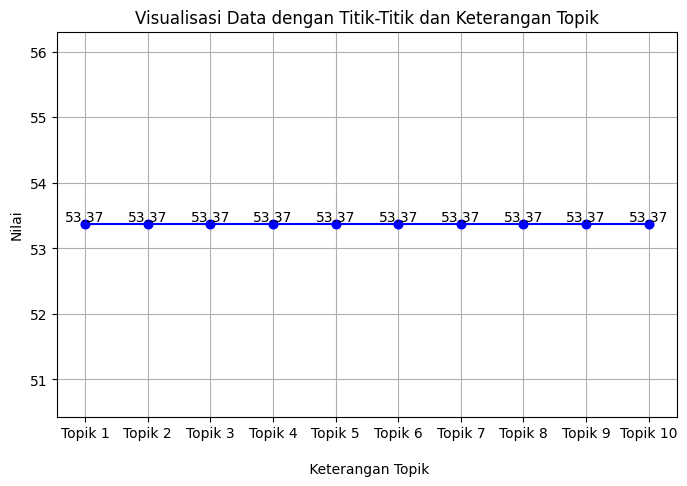

In [57]:
import matplotlib.pyplot as plt

data_accuracy_nb = accuracies_nb
topics = topik_kolom

# Membuat plot
# Menghitung jumlah data
num_data = len(data_accuracy_nb)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_nb)/2))
# Menambahkan garis yang menghubungkan titik-titik
plt.plot(topics, data_accuracy_nb, color='b', marker='o', linestyle='-')

plt.scatter(topics, data_accuracy_nb, color='b', marker='o')
plt.title("Visualisasi Data dengan Titik-Titik dan Keterangan Topik")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai")
plt.grid(True)

# Menampilkan keterangan nilai di atas titik-titik
for i in range(len(data_accuracy_nb)):
    plt.text(topics[i], data_accuracy_nb[i], f"{data_accuracy_nb[i]:.2f}", ha='center', va='bottom')

plt.show()

In [58]:
# yang paling tinggi nilainya
max_acc_nb = max(data_accuracy_nb)
ind_max_acc_nb = np.argmax(data_accuracy_nb)


print(f'''
Data yang paling tinggi yaitu : {max_acc_nb}
Pada Topik                    : {topik_kolom[ind_max_acc_nb]}
''')


Data yang paling tinggi yaitu : 53.37
Pada Topik                    : Topik 1



In [59]:
import joblib
# Simpan model ke dalam file

joblib.dump(nb, 'model_naive_bayes.pkl')

['model_naive_bayes.pkl']

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

inp = ("teknik informatika merupakan salah satu teknik ang paling banyak digunakan dalam dunia salah satunya tentang web")
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tf_inp = tfidf_vectorizer.fit_transform([inp])

# Mendapatkan nama fitur (kolom)
fitur_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari hasil one-hot encoding
tfidf_inp_df = pd.DataFrame(tf_inp.toarray(), columns=fitur_names)
tfidf_inp_df

,ang,banyak,dalam,digunakan,dunia,informatika,merupakan,paling,salah,satu,satunya,teknik,tentang,web
0,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.223607,0.447214,0.223607,0.223607,0.447214,0.223607,0.223607


In [61]:
k_inp = k
alpha_inp = 0.1
beta_inp = 0.2

lda_model_inp = LatentDirichletAllocation(n_components=k_inp, doc_topic_prior=alpha_inp, topic_word_prior=beta_inp)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_inp = lda_model_inp.fit_transform(tfidf_inp_df)

# simpan kolom
topik_kolom_inp = []

for i in range(1, k_inp + 1):
    topik_kolom_inp.append(f'Topik {i}')
    # print (i)

# # ====================== topik pd dokumen =========
inp_proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen_inp, columns=topik_kolom_inp)
# # proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
inp_proporsi_topik_dokumen_df

# Lakukan prediksi
model_inp = nb
predict_inp = model_inp.predict(inp_proporsi_topik_dokumen_df)

inp_proporsi_topik_dokumen_df
predict_inp

array(['RPL'], dtype='<U3')

### **K-Nearest Neighbors (KNN)**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# Inisialisasi array untuk menyimpan akurasi
accuracies_knn = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # x_train_model, X_test, y_train_model, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    knn = KNeighborsClassifier()

    # Latih model pada kolom topik tertentu
    knn.fit(x_train_model, y_train_model)

    # Lakukan prediksi
    y_pred = knn.predict(x_test_model)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model, y_pred)*100,2)
    accuracies_knn.append(accuracy)

accuracies_knn

[71.95, 71.95, 71.95, 71.95, 71.95, 71.95, 71.95, 71.95, 71.95, 71.95]

In [64]:
accuracies_knn_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_knn})
accuracies_knn_df.to_csv("accuracies_knn_df.csv",index=False)

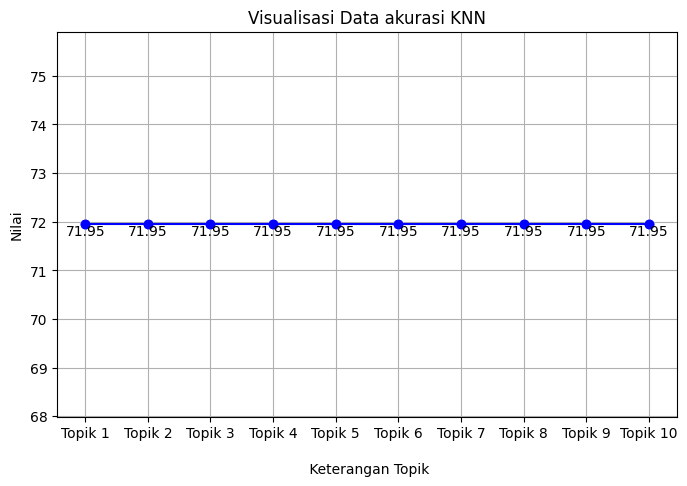


Data yang paling tinggi yaitu : 71.95
Pada Topik                    : Topik 1



In [65]:
import matplotlib.pyplot as plt

data_accuracy_knn = accuracies_knn
topics = topik_kolom

# Membuat plot
# Menghitung jumlah data
num_data = len(data_accuracy_knn)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_knn)/2))

# Menambahkan garis yang menghubungkan titik-titik
plt.plot(topics, data_accuracy_knn, color='b', marker='o', linestyle='-')

plt.scatter(topics, data_accuracy_knn, color='b', marker='o')

plt.title("Visualisasi Data akurasi KNN")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai")
plt.grid(True)

# Menampilkan keterangan nilai di atas titik-titik
for i in range(len(data_accuracy_knn)):
    plt.text(topics[i], data_accuracy_knn[i], f"{data_accuracy_knn[i]:.2f}", ha='center', va='top')

plt.show()

# yang paling tinggi nilainya
max_acc_knn = max(data_accuracy_knn)
ind_max_acc_knn = np.argmax(data_accuracy_knn)


print(f'''
Data yang paling tinggi yaitu : {max_acc_knn}
Pada Topik                    : {topik_kolom[ind_max_acc_knn]}
''')

In [66]:
joblib.dump(knn, 'model_knn.pkl')

['model_knn.pkl']

In [67]:
# Lakukan prediksi
model_inp = knn
predict_inp = model_inp.predict(inp_proporsi_topik_dokumen_df)

inp_proporsi_topik_dokumen_df
predict_inp

array(['RPL'], dtype=object)

### **Random Forest**

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi array untuk menyimpan akurasi
accuracies_rf = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    rf = RandomForestClassifier()

    # Latih model pada kolom topik tertentu
    rf.fit(x_train_model, y_train_model)

    # Lakukan prediksi
    y_pred = rf.predict(x_test_model)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model, y_pred)*100,2)
    accuracies_rf.append(accuracy)

accuracies_rf

[98.91, 98.91, 98.91, 98.91, 98.91, 98.91, 98.91, 98.91, 98.91, 98.91]

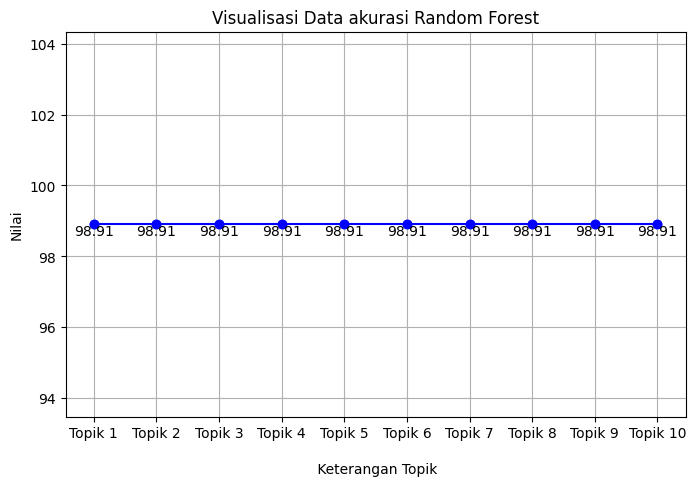


Data yang paling tinggi yaitu : 98.91
Pada Topik                    : Topik 1



In [73]:
import matplotlib.pyplot as plt

data_accuracy_rf = accuracies_rf
topics = topik_kolom

# Membuat plot
# Menghitung jumlah data
num_data = len(data_accuracy_rf)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_rf)/2))

# Menambahkan garis yang menghubungkan titik-titik
plt.plot(topics, data_accuracy_rf, color='b', marker='o', linestyle='-')

plt.scatter(topics, data_accuracy_rf, color='b', marker='o')

plt.title("Visualisasi Data akurasi Random Forest")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai")
plt.grid(True)

# Menampilkan keterangan nilai di atas titik-titik
for i in range(len(data_accuracy_rf)):
    plt.text(topics[i], data_accuracy_rf[i], f"{data_accuracy_rf[i]:.2f}", ha='center', va='top')

plt.show()

# yang paling tinggi nilainya
max_acc_rf = max(data_accuracy_rf)
ind_max_acc_rf = np.argmax(data_accuracy_rf)


print(f'''
Data yang paling tinggi yaitu : {max_acc_rf}
Pada Topik                    : {topik_kolom[ind_max_acc_rf]}
''')

In [70]:
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [71]:
# Lakukan prediksi
model_inp = rf
predict_inp = model_inp.predict(inp_proporsi_topik_dokumen_df)

inp_proporsi_topik_dokumen_df
predict_inp

array(['RPL'], dtype=object)

In [72]:
accuracies_rf_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_rf})
accuracies_rf_df.to_csv("accuracies_rf_df.csv",index=False)

In [ ]:
sklearn.__version__

'1.2.2'

## **Perbandingan Akurasi Model**

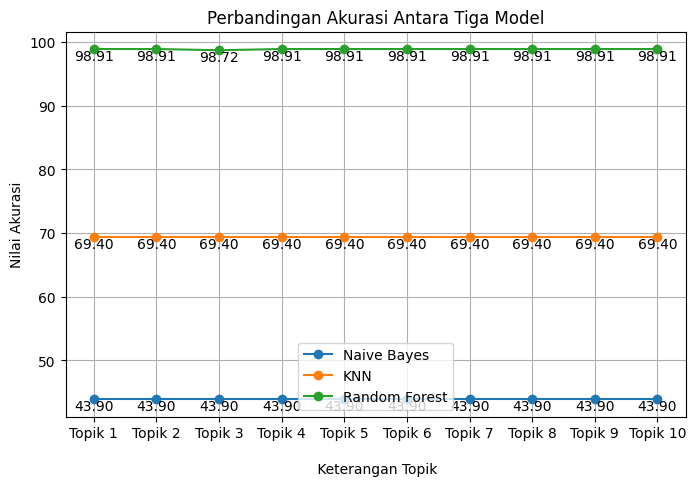

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data

topics = topik_kolom

# Membuat plot dengan tiga garis yang berbeda untuk setiap set data
# Menghitung jumlah data
num_data = len(data_accuracy_rf)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_rf)/2))
plt.plot(topics, data_accuracy_nb, marker='o', label='Naive Bayes')
plt.plot(topics, data_accuracy_knn, marker='o', label='KNN')
plt.plot(topics, data_accuracy_rf, marker='o', label='Random Forest')

for i in range(len(data_accuracy_nb)):
    plt.text(topics[i], data_accuracy_nb[i], f"{data_accuracy_nb[i]:.2f}", ha='center', va='top')
for i in range(len(data_accuracy_knn)):
    plt.text(topics[i], data_accuracy_knn[i], f"{data_accuracy_knn[i]:.2f}", ha='center', va='top')
for i in range(len(data_accuracy_rf)):
    plt.text(topics[i], data_accuracy_rf[i], f"{data_accuracy_rf[i]:.2f}", ha='center', va='top')

plt.title("Perbandingan Akurasi Antara Tiga Model")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai Akurasi")
plt.grid(True)
plt.legend()

plt.show()


### **Save**

In [ ]:
from google.colab import files
# files.download('/content/accuracies_nb_df.csv')
# files.download('/content/lda_model.pkl')
files.download('/content/rf_model.pkl')
# files.download('/content/accuracies_rf_df.csv')
# files.download('/content/ProporsiKataTopik_df_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
# Simpan model ke dalam file

joblib.dump(proporsi_topik_dokumen_train_df, 'proporsi_topik_dokumen_df_train.pkl')

['proporsi_topik_dokumen_df_train.pkl']

### **Implementasi**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

inp = input("masukkan teks: ")
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tf_inp = tfidf_vectorizer.fit_transform([inp])

# Mendapatkan nama fitur (kolom)
fitur_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari hasil one-hot encoding
tfidf_inp_df = pd.DataFrame(tf_inp.toarray(), columns=fitur_names)
tfidf_inp_df

masukkan teks: coba dulu ya


,coba,dulu,ya
0,0.57735,0.57735,0.57735


In [ ]:
lda_model_inp = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta)
proporsi_topik_dokumen_inp = lda_model_inp.fit_transform(tfidf_inp_df)
proporsi_topik_dokumen_inp

array([[0.72353161, 0.03949548, 0.03949548, 0.03949548, 0.03949548,
        0.03949548, 0.03949548, 0.03949548]])

In [ ]:
# Simpan model ke dalam file
joblib.dump(lda_model_inp, 'lda_model_inp.pkl')

['lda_model_inp.pkl']

In [ ]:
lda_model = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_train_imp = lda_model.fit_transform(data_tfidf_train)

# simpan kolom
topik_kolom = []

for i in range(1,8+1):
  topik_kolom.append(f'Topik {i}')
  print (f". . . . topik {i} telah dibuat")

proporsi_topik_dokumen_df_train_imp = pd.DataFrame(proporsi_topik_dokumen_train_imp, columns=topik_kolom)

proporsi_topik_dokumen_df_train_imp = pd.concat([proporsi_topik_dokumen_df_train_imp,y_tfidf_train],axis = 1)
proporsi_topik_dokumen_df_train_imp = proporsi_topik_dokumen_df_train_imp.dropna()

# Proporsi topik pada dokumen
proporsi_topik_dokumen_test_imp = lda_model.fit_transform(data_tfidf_test)

proporsi_topik_dokumen_df_test_imp = pd.DataFrame(proporsi_topik_dokumen_test_imp, columns=topik_kolom)

proporsi_topik_dokumen_df_test_imp = pd.concat([proporsi_topik_dokumen_df_test_imp,y_tfidf_test],axis = 1)
proporsi_topik_dokumen_df_test_imp = proporsi_topik_dokumen_df_test_imp.dropna()


# ====================
x_train_model_imp = proporsi_topik_dokumen_df_train_imp.iloc[:,:-1]
x_test_model_imp = proporsi_topik_dokumen_df_test_imp.iloc[:,:-1]
# x_test_model_imp
y_train_model_imp = proporsi_topik_dokumen_df_train_imp.iloc[:,-1]
y_test_model_imp = proporsi_topik_dokumen_df_test_imp.iloc[:,-1]

# Inisialisasi array untuk menyimpan akurasi
accuracies_rf_model = []

# Loop untuk setiap iterasi topik
for i in range(1, 8 + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    rf_model_imp = RandomForestClassifier()

    # Latih model pada kolom topik tertentu
    rf_model_imp.fit(x_train_model_imp, y_train_model_imp)

    # Lakukan prediksi
    y_pred = rf_model_imp.predict(x_test_model_imp)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model_imp, y_pred)*100,2)
    accuracies_rf_model.append(accuracy)

accuracies_rf_model


. . . . topik 1 telah dibuat
. . . . topik 2 telah dibuat
. . . . topik 3 telah dibuat
. . . . topik 4 telah dibuat
. . . . topik 5 telah dibuat
. . . . topik 6 telah dibuat
. . . . topik 7 telah dibuat
. . . . topik 8 telah dibuat


[43.75, 40.62, 40.62, 37.5, 40.62, 40.62, 40.62, 37.5]

In [ ]:
proporsi_topik_dokumen_df_train_imp

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Label
0,0.016303,0.885889,0.016301,0.016301,0.016301,0.016301,0.016301,0.016301,RPL
1,0.901239,0.014113,0.014108,0.014108,0.014108,0.014108,0.014108,0.014108,RPL
2,0.014893,0.895749,0.014893,0.014893,0.014893,0.014893,0.014893,0.014893,RPL
3,0.015923,0.888539,0.015923,0.015923,0.015923,0.015923,0.015924,0.015923,KK
4,0.014143,0.901008,0.014141,0.014142,0.014142,0.014141,0.014141,0.014141,KK
...,...,...,...,...,...,...,...,...,...
680,0.015922,0.888586,0.015915,0.015915,0.015916,0.015915,0.015915,0.015916,KK
681,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,KK
682,0.012784,0.910510,0.012784,0.012784,0.012784,0.012784,0.012784,0.012784,RPL
683,0.013764,0.706428,0.013764,0.013764,0.210987,0.013764,0.013765,0.013764,KK


In [ ]:
# Simpan model ke dalam file
# joblib.dump(rf_model, 'rf_model.pkl')
# Simpan model ke dalam file
joblib.dump(rf_model_imp, 'rf_model_imp.joblib',protocol=2)
files.download('/content/rf_model_imp.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# simpan kolom
topik_kolom_imp = []

for i in range(1, 8 + 1):
    topik_kolom_imp.append(f'Topik {i}')
    # print (i)

# # ====================== topik pd dokumen =========
imp_proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen_inp, columns=topik_kolom_imp)
# # proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
imp_proporsi_topik_dokumen_df

# Lakukan prediksi
model_imp = rf_model_imp
predict_imp = model_imp.predict(imp_proporsi_topik_dokumen_df)

# imp_proporsi_topik_dokumen_df
predict_imp

array(['RPL'], dtype=object)

In [ ]:
model_imp_cb = joblib.load("rf_model_imp.joblib")
predict_imp = model_imp_cb.predict(imp_proporsi_topik_dokumen_df)

# imp_proporsi_topik_dokumen_df
predict_imp

array(['RPL'], dtype=object)